In [1]:
#Use this to generate points on the circumference for Fuji dataset
#both training and testing images

import os
import json
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from circum import xy_values
import random
import shutil
import ast

In [2]:
os.chdir("../Annotation projects/FUJI/")

In [3]:
# all_images = os.listdir("images")

In [4]:
# val_set = random.sample(all_images,int(0.2*len(all_images)))
# test_set = random.sample(list(np.setdiff1d(all_images,val_set)),int(0.2*len(all_images)))
# train_set = np.setdiff1d(list(np.setdiff1d(all_images,val_set)),test_set)

In [5]:
# set_ = "val"
# for i in val_set:
#     src_train = os.path.join("images", i)
#     dest_train = os.path.join("{}_images".format(set_),i)
#     annot_name, ext = os.path.splitext(i)
#     shutil.copy(src_train,dest_train)

In [6]:
# train_images = os.listdir("train_images")
# val_images = os.listdir("val_images")
# test_images = os.listdir("test_images")

In [7]:
# #Filter images by set from all annotations
# all_df = pd.read_csv("annotations/via_project_all_annotations.csv")

In [8]:
# # csv for all sets
# train_csv = all_df[all_df["filename"].isin(train_images)].reset_index(drop=True)
# train_csv.to_csv("train.csv", index = False)
# val_csv = all_df[all_df["filename"].isin(val_images)].reset_index(drop=True)
# val_csv.to_csv("val.csv", index = False)
# test_csv = all_df[all_df["filename"].isin(test_images)].reset_index(drop=True)
# test_csv.to_csv("test.csv", index = False)

## TEST

6
_MG_8065_24.jpg


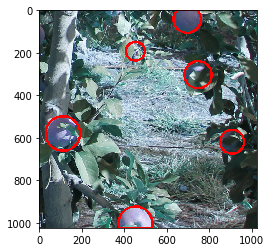

In [9]:
metadf2 = pd.read_csv("test.csv")
a = metadf2.loc[metadf2["filename"]==random.choice(metadf2["filename"].unique())]
a = a.reset_index(drop=True)
print(len(a))
image = cv.imread(os.path.join("test_images",a.iloc[0]["filename"]))
print(a.iloc[0]["filename"])
all_points = []
for i in range(len(a)):
    pts = []
    x = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_x"]
    y = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_y"]
    for i,j in zip(x,y):
        pts.append([i,j])
    all_points.append(pts)

ptss = np.array(all_points)
img = cv.polylines(image,np.int32(ptss),isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(image)
plt.show()
plt.close()

## Generate file names for all 3 sets

In [18]:
def WriteSets(set_path, set_name):
    files = os.listdir(set_path)
    if os.path.exists("sets/{}_filenames.txt".format(set_name)):
        print("File already exist. Skipping")
        return None
    with open("sets/{}_filenames.txt".format(set_name),"a+") as fp:
        for line in files:
            if line.startswith("via"): #skip annotations file
                continue
            fp.write(line+"\n")

In [19]:
train_images = "train_images"
test_images = "test_images"
val_images = "val_images"
all_images = "images"
WriteSets(train_images,"acfr_fuji_train")
WriteSets(test_images,"acfr_fuji_test")
WriteSets(val_images,"acfr_fuji_val")
WriteSets(all_images,"acfr_fuji_all")

## ROUGH SPACE 1

In [2]:
os.chdir("../Annotation projects/FUJI/")

In [3]:
with open("train_projects/via_project_3Jul2020_10h24m(231)-complete.json","r") as file:
    data = file.read()

In [4]:
data = json.loads(data)

In [5]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']
meta_fuji = pd.DataFrame(columns=headers)
meta_fuji

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes


In [6]:
i = 1
one = list(list(data.values())[i].values())[i]

# ONE

In [7]:
i = 1
one = list(list(data.values())[1].values())[i]
a = one["filename"] #filename
b = one["size"] #file_size
c = "{}" #file_attributes
d = len(one["regions"])#region_count
g = "{}" #region_attributes
img = cv.imread(os.path.join("train_images",a))
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_fuji = pd.concat([meta_fuji,one_df],ignore_index=True)
meta_fuji

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,_MG_3004_03.jpg,198250,{},7,0,"{'name': 'polygon', 'all_points_x': [685, 685,...",{}
1,_MG_3004_03.jpg,198250,{},7,1,"{'name': 'polygon', 'all_points_x': [826, 825,...",{}
2,_MG_3004_03.jpg,198250,{},7,2,"{'name': 'polygon', 'all_points_x': [325, 324,...",{}
3,_MG_3004_03.jpg,198250,{},7,3,"{'name': 'polygon', 'all_points_x': [238, 237,...",{}
4,_MG_3004_03.jpg,198250,{},7,4,"{'name': 'polygon', 'all_points_x': [102, 101,...",{}
5,_MG_3004_03.jpg,198250,{},7,5,"{'name': 'polygon', 'all_points_x': [109, 108,...",{}
6,_MG_3004_03.jpg,198250,{},7,6,"{'name': 'polygon', 'all_points_x': [193, 192,...",{}


# LOOP THROUGH ALL IMAGES

In [8]:
n = len(list(list(data.values())[1].values()))
meta_fuji = pd.DataFrame(columns=headers)
meta_fuji

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes


In [9]:
for i in range(n):
    one = list(list(data.values())[1].values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(os.path.join("train_images",a))
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        row = [a,b,c,d,e,f,g]
        one_df.loc[j] = row
    meta_fuji = pd.concat([meta_fuji,one_df],ignore_index=True)

In [10]:
#meta_fuji.to_csv("fuji.csv",index=False)

## PLOT MASKS

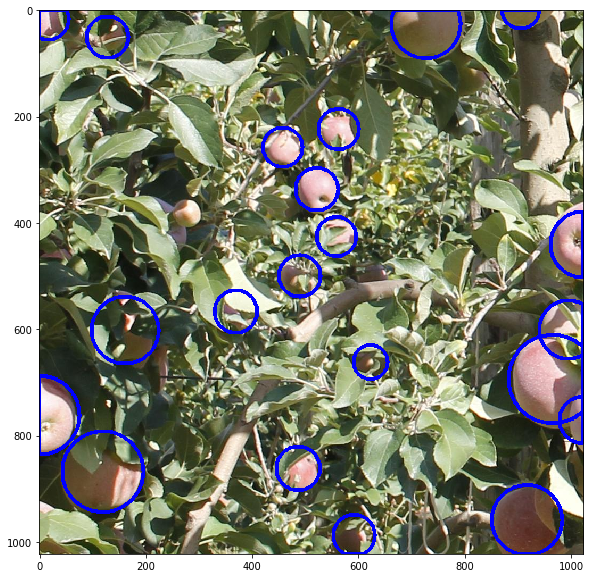

In [15]:
train = "test_images"
all_images = os.listdir(train)
with open (os.path.join(train,"via_project_fuji.json"),"r") as f:
    data = f.read()
data = json.loads(data)
annotations = random.choice(list(data.values()))
image = cv.imread(os.path.join(train,annotations["filename"]))
for m in range(len(annotations["regions"])):
    
    x = annotations["regions"][m]["shape_attributes"]["all_points_x"]
    y = annotations["regions"][m]["shape_attributes"]["all_points_y"]
    #print(reg_x,reg_y)
    pts = []
    for j,k in zip(x,y):
        pts.append([j,k])
    pts = np.array(pts)
    #print(pts)
    img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=5)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
#plt.savefig(os.path.join("/home/kiprono/Desktop/","prediction"+name))


## ROUGH SPACE 2

In [ ]:
one["filename"] #filename
one["size"] #file_size
len(one["regions"])#region_count
one["regions"][0]["region_attributes"] #region_attributes
one["regions"][0]["shape_attributes"]["cx"]#xc
one["regions"][0]["shape_attributes"]["cy"]#yc
one["regions"][0]["shape_attributes"]["r"]#radius
{}#file_attributes

In [ ]:
with open("via_project_fuji.json","r") as f:
    data = f.read()

In [ ]:
data = json.loads(data)
annotations = list(data.values())

In [ ]:
x = annotations[2]["regions"][0]["shape_attributes"]["all_points_x"]
y = annotations[2]["regions"][0]["shape_attributes"]["all_points_y"]

In [ ]:
image = cv.imread(annotations[2]["filename"])
plt.imshow(image)

In [ ]:
pts = []
for i,j in zip(x,y):
    pts.append([i,j])

In [ ]:
pts = np.array(pts)

In [ ]:
img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

In [ ]:
plt.imshow(img)